In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from collections import OrderedDict  #保持Key的顺序
from datetime import datetime,date,timedelta
import matplotlib.pyplot as plt # 画图用
import pickle  # 打包
from jqfactor import *
from jqdata import *
plt.style.use('ggplot')  # 设置图表风格
import warnings  
warnings.filterwarnings('ignore') 


In [15]:
momentum_10D_datas=pd.read_csv('factor_10D.csv')
momentum_5D_datas=pd.read_csv('factor_5D.csv')
#momentum_5D_datas

,date,codes,returns,risk,momentum
0,2022-01-04,000001.XSHE,1.019873,0.025308,-0.901605
1,2022-01-04,000002.XSHE,0.993255,0.025308,-0.928223
2,2022-01-04,000006.XSHE,1.212727,0.025308,-0.708750
3,2022-01-04,000007.XSHE,0.972705,0.025308,-0.948773
4,2022-01-04,000008.XSHE,0.991416,0.025308,-0.930061
5,2022-01-04,000009.XSHE,1.011785,0.025308,-0.909693
6,2022-01-04,000010.XSHE,0.979167,0.025308,-0.942311
7,2022-01-04,000011.XSHE,1.063187,0.025308,-0.858291
8,2022-01-04,000012.XSHE,0.980655,0.025308,-0.940823
9,2022-01-04,000014.XSHE,1.090062,0.025308,-0.831415


In [16]:
#设置双重索引
pd.to_datetime(momentum_5D_datas['date'])
pd.to_datetime(momentum_10D_datas['date'])
momentum_5D_datas.set_index(['date','codes'],inplace=True)
momentum_10D_datas.set_index(['date','codes'],inplace=True)

In [17]:
start_time='2022-01-01'
end_time='2022-12-31'

In [21]:
period=5
quantiles=10
far_5D=analyze_factor(factor=momentum_5D_datas.loc[:,'returns'],start_date=start_time,end_date=end_time,
                      weight_method='avg',industry='sw_l1',quantiles=10,periods=period)


In [22]:
far_10D=analyze_factor(factor=momentum_10D_datas.loc[:,'returns'],start_date=start_time,end_date=end_time,
                      weight_method='avg',industry='sw_l1',quantiles=10,periods=period)

In [27]:
# 因子分析字典
k=['5D','10D']
v=[far_5D,far_10D]
basic_far=dict(zip(k,v))
# 保存分析后的数据
pkl_file = open('basic_far.pkl', 'wb')
pickle.dump(basic_far, pkl_file, 0)

In [3]:
# 读取分析文件
pkl_file = open('basic_far.pkl', 'rb')
basic_far = pickle.load(pkl_file)
pkl_file.close()

In [29]:
ic_mean_m1=basic_far['5D'].calc_mean_information_coefficient(method='rank')
ic_mean_m2=basic_far['10D'].calc_mean_information_coefficient(method='rank')
ic_mean=pd.concat([ic_mean_m1,ic_mean_m2],axis=1)
ic_mean.columns=['5D','10D']
print('各因子分组IC Mean情况\n','-'*60,'\n',ic_mean,'\n','-'*60)

各因子分组IC Mean情况
 ------------------------------------------------------------ 
                 5D       10D
period_5  0.013519  0.017627 
 ------------------------------------------------------------


Text(0.5, 1.0, 'IC_MEAN')

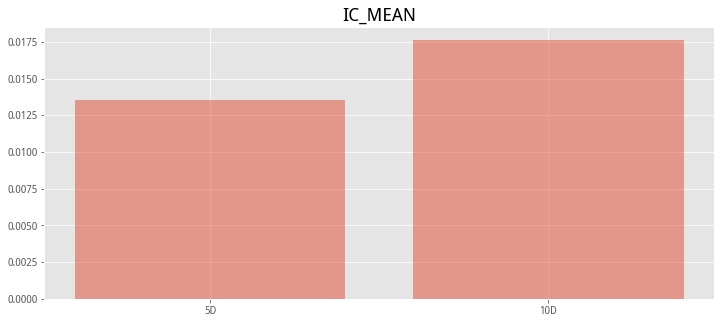

In [30]:
plt.figure(1,figsize=(12,5))
plt.bar(ic_mean.columns,ic_mean.values[0],align='center', alpha=0.5)
plt.title('IC_MEAN',fontsize=18)

In [31]:
def factor_report(far):
    '''
    far:为因子分析后的数据类型
    ---------
    return:dataframe
    '''
    # 获取最大百分位组减最小百分位组的收益率及标准差(超额收益)
    mean, std = far.compute_mean_returns_spread (by_date=False, demeaned=1)
    # 计算每组的夏普-按调仓
    longshort_sharpe=mean/std
    # 计算Mono_score(超额收益)
    ## 因子为升序排列10因子最大，1最小，研报中10组为降序
    ## MONO_Score，主要组别情况
    Numerator_mean, _ = far.compute_mean_returns_spread (upper_quant=1,lower_quant=10,by_date=False,demeaned=1)
    Denominator_mean,_=far.compute_mean_returns_spread (upper_quant=3,lower_quant=8,by_date=False, demeaned=1)
    MONO_Score=Numerator_mean/Denominator_mean
    # IC_IR
    IC_IR=far.calc_mean_information_coefficient(method='rank')
    IC=far.calc_mean_information_coefficient(method='normal')
    # 换手率
    ## 计算每组持仓的平均换手率
    v=[]
    data_dic=far.quantile_turnover
    periods=data_dic.keys()
    for period in periods:
        temp=data_dic[period].mean()
        v.append(temp.mean())
    turnover=pd.Series(v,index=periods)
    report=pd.concat([IC,IC_IR,longshort_sharpe,MONO_Score,turnover],axis=1)
    report.columns=['IC','IC_IR','LongShort_sharpe','MONO_Score','Turnover']
    return report

# 查看持仓周期报告
def trans2period(fardic,period):
    '''
    fardic:dic,key为far名称,为far数据
    period：为调仓周期
    ---------
    return:dataframe
    '''
    rList=[]
    for farname,farvalue in fardic.items():
        r_x=factor_report(farvalue).loc['period_'+str(period)]
        r_x.name=farname
        rList.append(r_x)
    datas=pd.concat(rList,axis=1)
    return datas.T

In [32]:
trans2period(basic_far,5)

,IC,IC_IR,LongShort_sharpe,MONO_Score,Turnover
5D,0.017393,0.013519,5.365693,18.767698,0.000871
10D,0.025206,0.017627,6.723242,2.819487,0.000847


<Figure size 432x288 with 0 Axes>

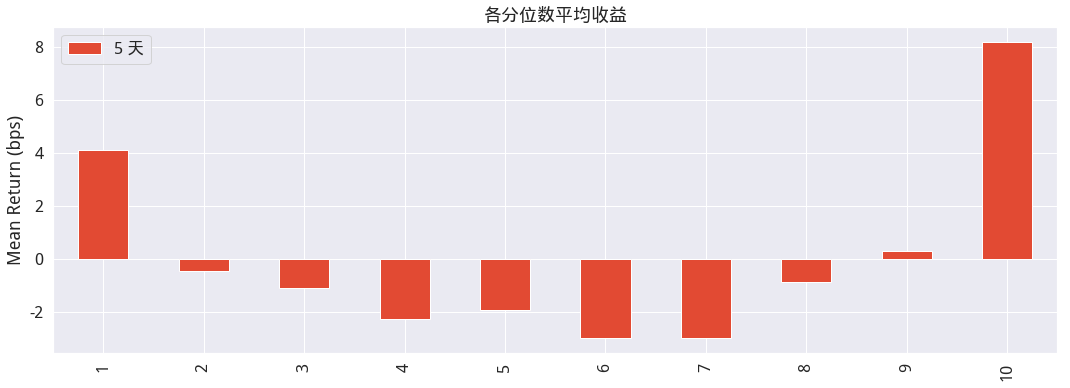

In [33]:
basic_far['5D'].plot_quantile_returns_bar(demeaned=1)

<Figure size 432x288 with 0 Axes>

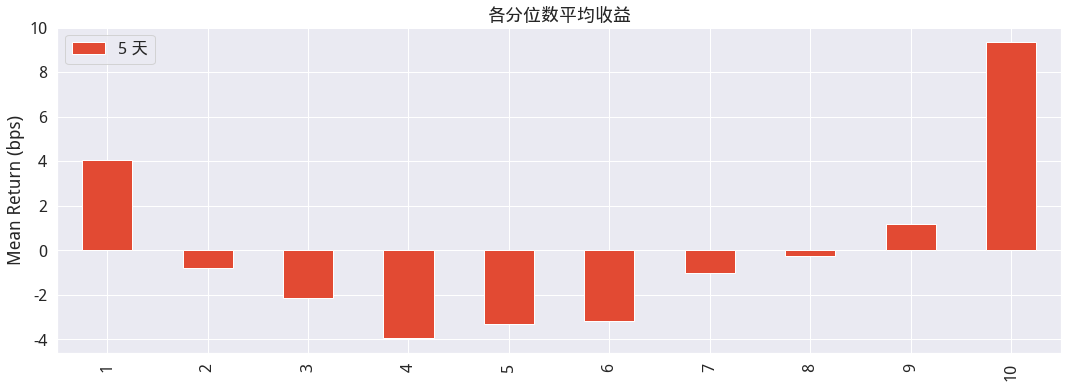

In [34]:
basic_far['10D'].plot_quantile_returns_bar(demeaned=1)

<Figure size 432x288 with 0 Axes>

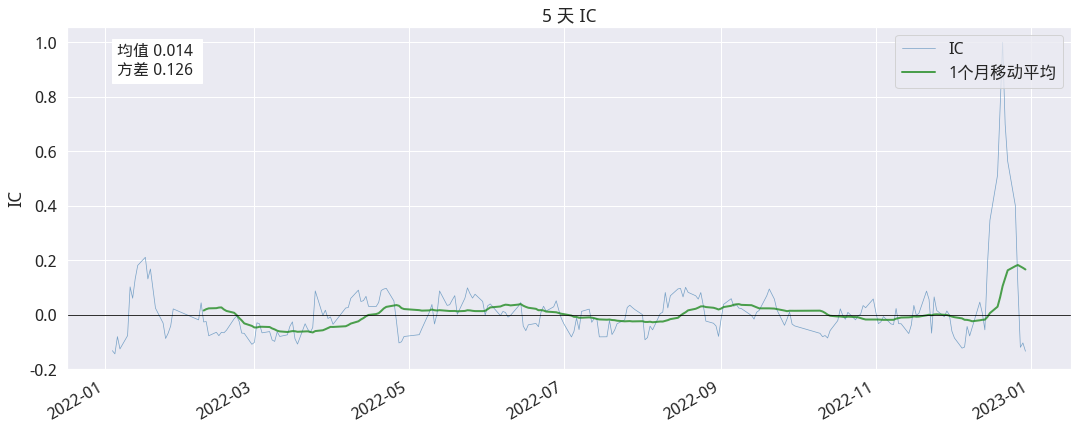

In [4]:
basic_far['5D'].plot_ic_ts(method='rank')

<Figure size 432x288 with 0 Axes>

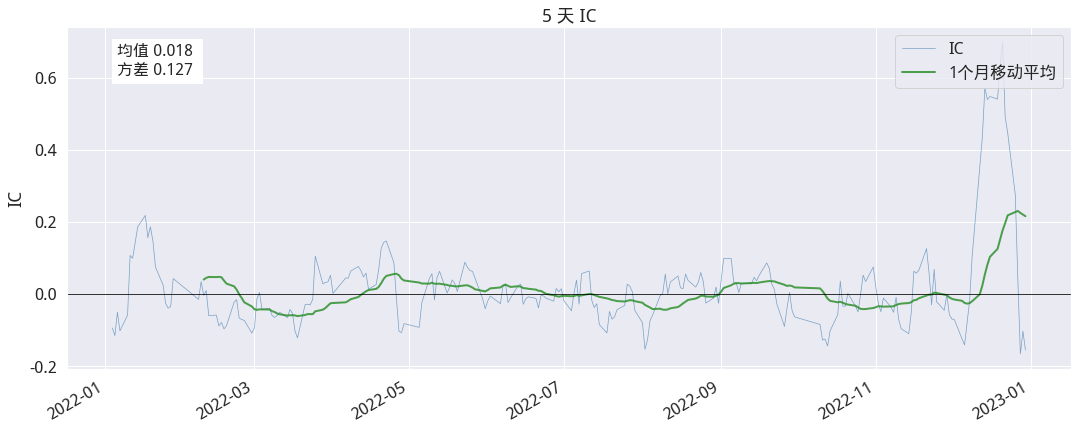

In [5]:
basic_far['10D'].plot_ic_ts(method='rank')

提纯后的多空净值为-0.0995,原始因子多空收净值为-0.1298


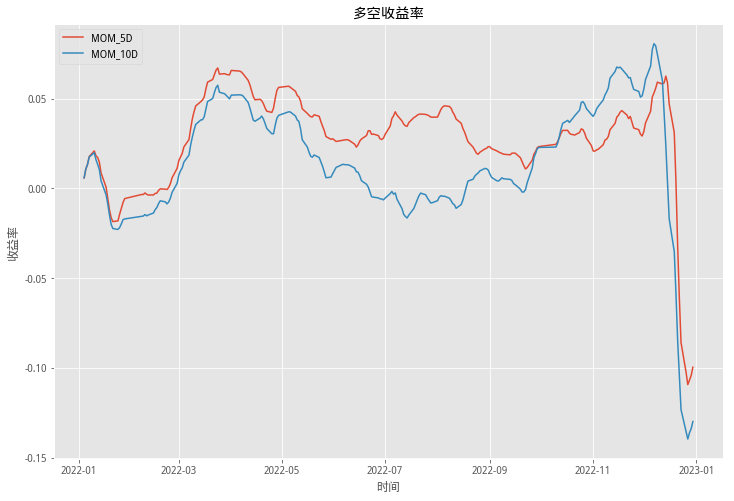

In [6]:
M5_mean, _ = basic_far['5D'].compute_mean_returns_spread (upper_quant=1,lower_quant=10,by_date=True,demeaned=True)
M10_mean, _ = basic_far['10D'].compute_mean_returns_spread (upper_quant=1,lower_quant=10,by_date=True,demeaned=True)


M5_cum=M5_mean.cumsum()
M10_cum=M10_mean.cumsum()

print('提纯后的多空净值为%2.4f,原始因子多空收净值为%2.4f'%(M5_cum.iloc[-1][0],M10_cum.iloc[-1][0]))
plt.figure(figsize=(12,8))
plt.title("多空收益率")
plt.xlabel("时间")
plt.ylabel("收益率")

plt.plot(M5_cum,label="MOM_5D")
plt.plot(M10_cum,label="MOM_10D")
plt.legend()

In [5]:
df=pd.read_csv('stocks_clean.csv')
df.head()

,0608,time,code,open,close,org_ret_day,ret_day
0,0,2008-01-02,002233.XSHE,0.0,0.0,0.0,0.0
1,1,2008-01-03,002233.XSHE,0.0,0.0,0.0,0.0
2,2,2008-01-04,002233.XSHE,0.0,0.0,0.0,0.0
3,3,2008-01-07,002233.XSHE,0.0,0.0,0.0,0.0
4,4,2008-01-08,002233.XSHE,0.0,0.0,0.0,0.0


In [6]:

stock_data = df[(df['time'] >= start_time) & (df['time'] <= end_time)]
stock_data=stock_data.drop(['0608'],axis=1)
#stock_data.head()

In [7]:
total_days=len(stock_data['time'].unique())
temp=list(stock_data['time'].unique())
temp.sort()

In [15]:
def get_momentum_factor(dates,observing): 
    dict_=OrderedDict() # 创建每期存取数据字典
    for date in dates:

        stocks=stock_data['code']  # 提取各交易日的成分股中满足筛选条件的股票池
            # step1:计算股票过去N日的收益率
            ## 提取各股票过去N个交易日的涨跌幅，即为过去N日内的收益率

        for i in range(observing, total_days-1):
            # 计算对数收益率
            start_day = temp[i-observing]  # 观测期第一天
            end_day = temp[i-1]  # 观测期最后一天
            # 取出在观测期内的数据
            stock_temp = stock_data[(stock_data['time'] >= start_day) & (stock_data['time'] <= end_day)]
            stock_temp=stock_temp.fillna(0)
            stock_temp['org_ret_day']=1+stock_temp['org_ret_day']
            data=pd.DataFrame()

            data['returns']= stock_temp.groupby('code')['org_ret_day'].prod()



            data['risk']=stock_temp['org_ret_day'].std() #series


            data['momentum']=data['returns']-3000*(data['risk']**2)  #计算动量因子


            dict_[datetime.strptime(date,"%Y-%m-%d")]=data

    datas=pd.concat(dict_.values(),keys=dict_.keys())
    datas.index.names=['date','codes']
    return datas


In [16]:
dates=stock_data['time'].unique()

In [17]:
momentum_5D_datas=get_momentum_factor(dates,5) 
momentum_10D_datas=get_momentum_factor(dates,10)  

In [18]:
# 构建字典
k=['10D','5D']
v=[momentum_10D_datas,momentum_5D_datas]
momentum_factor=dict(zip(k,v))
# 把计算出的因子数据写入文件 方便后续调用
pkl_file = open('factor.pkl', 'wb')
pickle.dump(momentum_factor, pkl_file, 0)

In [8]:
pkl_file = open('factor.pkl', 'rb')
mom_factor = pd.read_pickle(pkl_file)
pkl_file.close()
mom_factor

ModuleNotFoundError: No module named 'pandas.core.internals.managers'; 'pandas.core.internals' is not a package

In [11]:
factor=momentum_5D_datas['momentum']
prices = stock_data.pivot(index='time', columns='code', values='close')
prices.index=pd.to_datetime(prices.index)

In [15]:
prices

code,000001.XSHE,000002.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,000012.XSHE,000014.XSHE,...,605507.XSHG,605555.XSHG,605566.XSHG,605567.XSHG,605577.XSHG,605580.XSHG,605588.XSHG,605589.XSHG,605598.XSHG,605599.XSHG
time,,,,,,,,,,,,,,,,,,,,,
2022-01-04,15.98,18.35,4.32,6.23,2.95,13.94,3.83,10.77,9.40,6.71,...,27.82,19.23,30.20,23.01,14.50,10.80,39.50,36.14,11.37,12.77
2022-01-05,16.45,18.96,4.30,6.50,2.85,13.74,3.91,10.60,9.15,6.71,...,27.11,18.24,29.08,22.39,14.49,10.57,38.89,35.28,12.08,14.04
2022-01-06,16.42,18.85,4.31,6.80,2.98,14.09,3.88,10.68,9.17,6.84,...,29.82,19.26,29.35,20.15,14.25,10.59,39.46,35.36,13.29,13.63
2022-01-07,16.49,19.61,4.33,6.76,2.86,13.86,3.84,10.80,9.08,6.76,...,30.00,18.56,28.99,18.86,13.50,10.26,39.06,35.23,14.62,12.94
2022-01-10,16.48,19.85,4.37,6.42,2.85,13.97,3.82,10.85,9.02,6.96,...,29.42,18.72,29.41,19.27,14.01,10.32,40.26,33.99,13.67,12.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,12.47,17.47,5.92,7.87,2.32,12.59,3.84,11.24,6.64,10.13,...,25.37,14.55,23.18,15.55,9.84,8.11,28.80,22.03,19.50,9.03
2022-12-27,12.80,17.61,6.51,7.84,2.34,12.23,3.86,11.48,6.64,10.30,...,25.25,14.56,23.62,15.57,9.90,8.19,29.03,22.29,19.39,9.64
2022-12-28,12.83,17.67,6.67,7.84,2.31,12.02,3.76,11.61,6.59,10.53,...,25.33,14.23,22.92,14.98,9.70,8.19,28.43,21.29,18.46,9.53


In [ ]:

# 对因子进行分析
far = ja.analyze_factor(
    factor_data,  # factor_data 为因子值的 pandas.DataFrame
    quantiles=10,
    periods=(1, 10),
    industry='jq_l1',
    weight_method='avg',
    max_loss=0.1
)

# 获取整理后的因子的IC值
far.ic

In [ ]:
cerebro = bt.Cerebro()  # 初始化回测系统
start_date = datetime(2023, 1, 3)  # 回测开始时间
end_date = datetime(2023, 6, 16)  # 回测结束时间
data = bt.feeds.PanasData(dataname=stock_hfq_df, fromdate=start_date, todate=end_date)  # 加载数据
# data=bt.feeds.PandasData(dataname=df,fromdate=start_date,todate=end_date)#加银数据
cerebro.adddata(data)  # 将数据传入回测系统
cerebro.addstrategy(MyStrategy)  # 将交易策略加载到回测系统中
# 加入pyfolio分析者
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
start_cash = 1000000
cerebro.broker.setcash(start_cash)  # 设置初始资本为 100000
cerebro.broker.setcommission(commission=0)  # 设置交易手续费为 0.2%
result = cerebro.run()  # 运行回测系统

port_value = cerebro.broker.getvalue()  # 获取回测结束后的总资金
pnl = port_value - start_cash  # 盈亏统计

print(f"初始资金: {start_cash}\n回测期间：{start_date.strftime('%Y%m%d')}:{end_date.strftime('%Y%m%d')}")
print(f"总资金: {round(port_value, 2)}")
print(f"净收益: {round(pnl, 2)}")

# cerebro.plot(style='candlestick')  # 画图

cerebro.broker.getvalue()

strat = result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
cerebro.plot()

# Use quantstats to output backtrader backtest results
qs.reports.html(returns, output='temp.html')

stock = qs.utils.download_returns(returns)

In [10]:
with zipfile.ZipFile('factor_10D.zip','r') as zip_ref:
    zip_ref.extractall()

In [14]:
with zipfile.ZipFile('factor_5D.zip','r') as zip_ref:
    zip_ref.extractall()